In [176]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 2)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import time

# Read Data

# Data Source:

https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis

In [3]:
loan_data = pd.read_csv('C:/Users/muham/Downloads/Personal Development/Projects/Ryerson Capstone Project/loan_data.csv')

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Since all columns have the same non-null values, there are no blanks or null values

In [6]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.1,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.2,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.5,0,1,0,0


Mix of numerical and categorical features.

- Categorical Features:
    - purpose
    - credit.policy
    - inq.last.6.mths
    - delinq.2yrs
    - pub.rec

- Numerical Features:
    - int.rate
    - installment
    - log.annual.inc
    - dti
    - fico
    - days.with.cr.line
    - revol.bal
    - revol.util
    
- Target Feature:
    - not.fully.paid

# Exploratory Data Analysis (EDA)

In [7]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.80,0.40,0.00,1.00,1.00,1.00,1.00e+00
int.rate,9578.0,0.12,0.03,0.06,0.10,0.12,0.14,2.16e-01
installment,9578.0,319.09,207.07,15.67,163.77,268.95,432.76,9.40e+02
log.annual.inc,9578.0,10.93,0.61,7.55,10.56,10.93,11.29,1.45e+01
dti,9578.0,12.61,6.88,0.00,7.21,12.66,17.95,3.00e+01
fico,9578.0,710.85,37.97,612.00,682.00,707.00,737.00,8.27e+02
days.with.cr.line,9578.0,4560.77,2496.93,178.96,2820.00,4139.96,5730.00,1.76e+04
revol.bal,9578.0,16913.96,33756.19,0.00,3187.00,8596.00,18249.50,1.21e+06
revol.util,9578.0,46.80,29.01,0.00,22.60,46.30,70.90,1.19e+02
inq.last.6mths,9578.0,1.58,2.20,0.00,0.00,1.00,2.00,3.30e+01


Possibility of some outliers - however, since most data pojnts will have outliers in real life, we should let the model learn to predict on outlier values

In [8]:
loan_data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### int.rate

<AxesSubplot:xlabel='int.rate'>

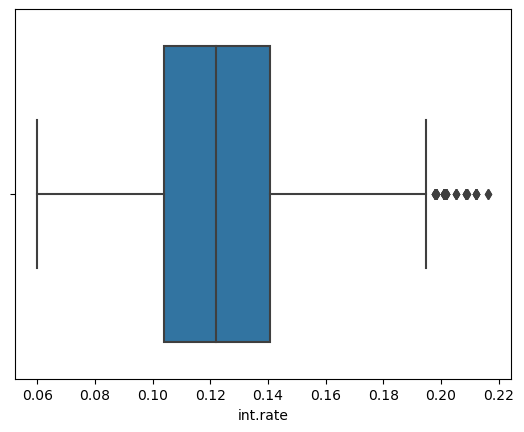

In [9]:
sns.boxplot(x=loan_data['int.rate'])

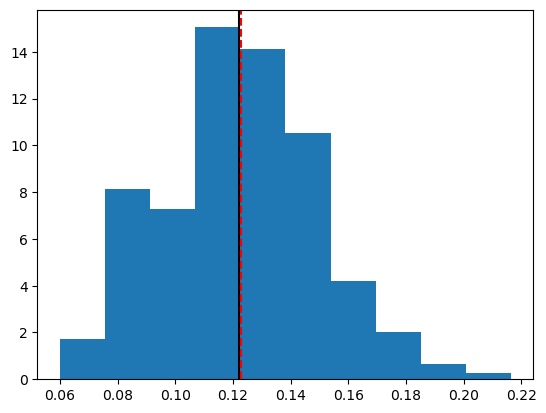

In [10]:
import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['int.rate'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['int.rate'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['int.rate'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median close
- Although there are some outliers on the right end based on IQR, this would be expected for interest rate

### installment

<AxesSubplot:xlabel='installment'>

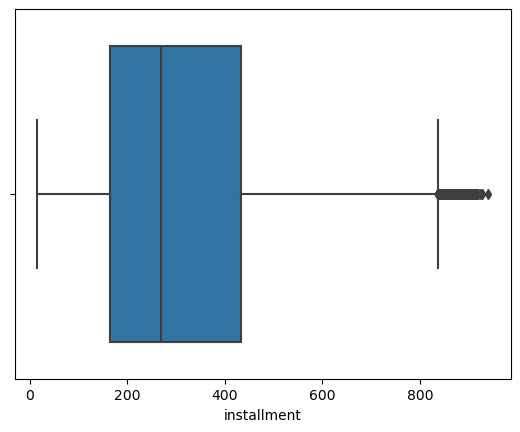

In [11]:
sns.boxplot(x=loan_data['installment'])

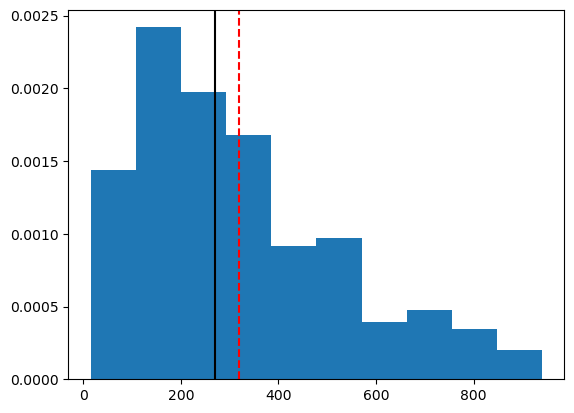

In [12]:
import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['installment'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['installment'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['installment'].median(), color = 'black', linestyle='-')

Observations:
- Slightly positively skewed
- Mean is greater than Median
- Although there are some outliers on the right end based on IQR, this would be expected for installment amount

### log.annual.inc

<AxesSubplot:xlabel='log.annual.inc'>

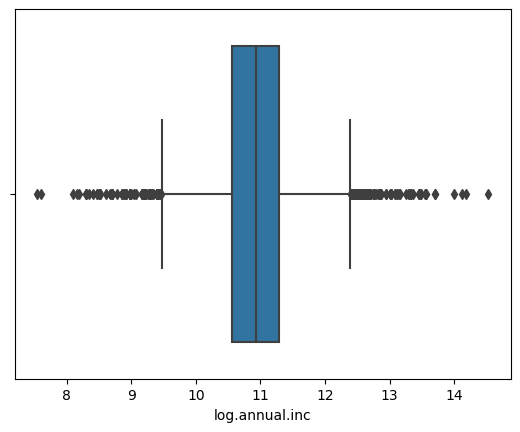

In [13]:
sns.boxplot(x=loan_data['log.annual.inc'])

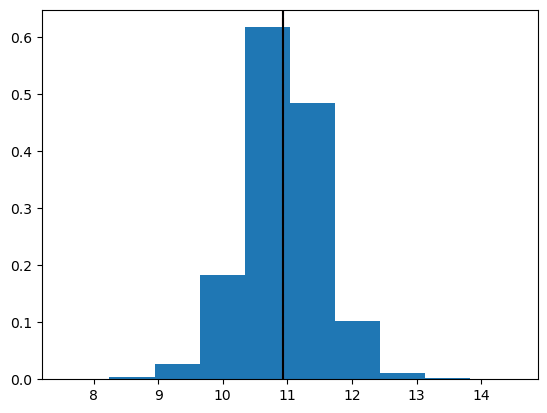

In [14]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['log.annual.inc'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['log.annual.inc'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['log.annual.inc'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are equal
- Although there are many outliers on the either side based on IQR, this would be expected for log of income

### dti

<AxesSubplot:xlabel='dti'>

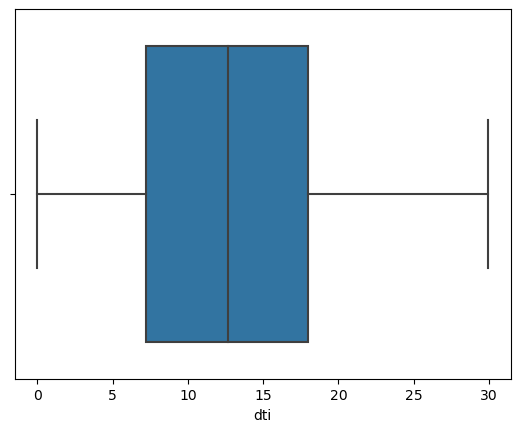

In [15]:
sns.boxplot(x=loan_data['dti'])

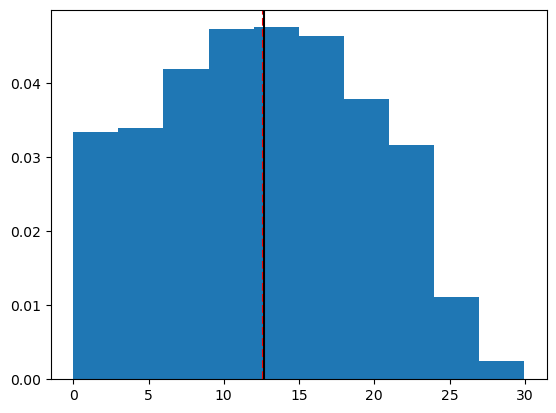

In [16]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['dti'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['dti'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['dti'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are very close
- No outliers

### fico

<AxesSubplot:xlabel='fico'>

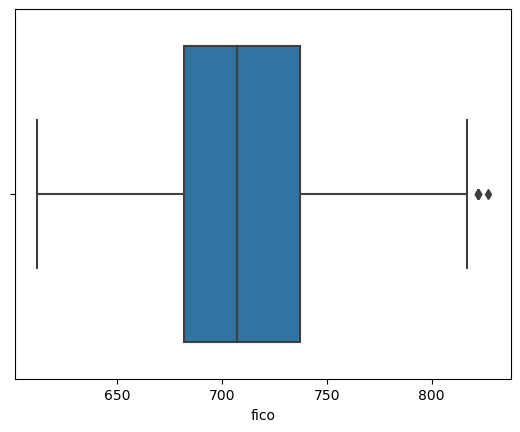

In [17]:
sns.boxplot(x=loan_data['fico'])

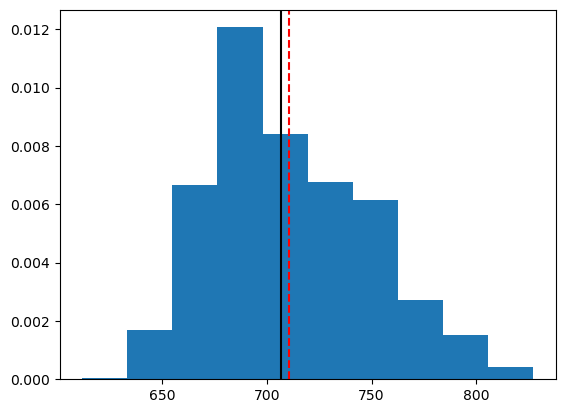

In [18]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['fico'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['fico'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['fico'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are very close
- Few outliers and a slightly positively skewed distribution

### days.with.cr.line

<AxesSubplot:xlabel='days.with.cr.line'>

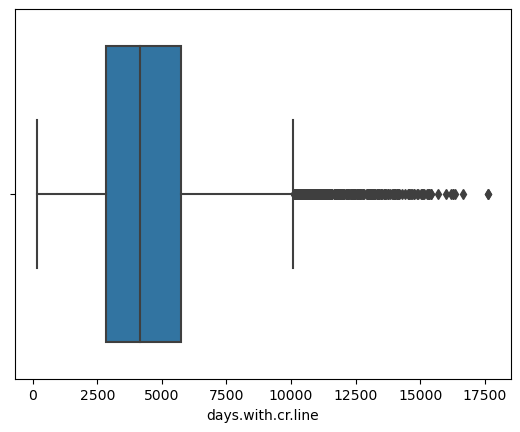

In [19]:
sns.boxplot(x=loan_data['days.with.cr.line'])

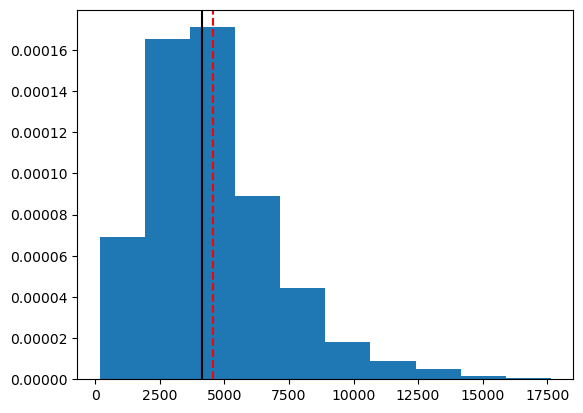

In [20]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['days.with.cr.line'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['days.with.cr.line'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['days.with.cr.line'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are close
- Many outliers and a positively skewed distribution

### revol.bal

<AxesSubplot:xlabel='revol.bal'>

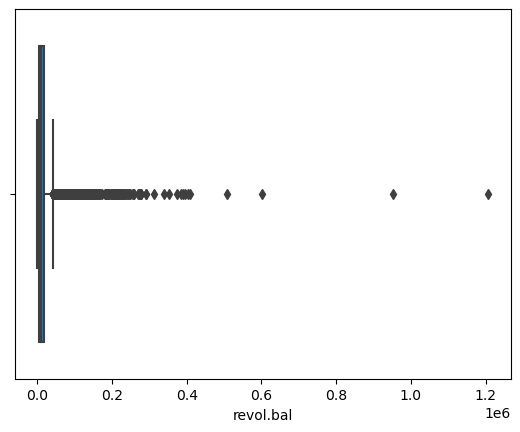

In [21]:
sns.boxplot(x=loan_data['revol.bal'])

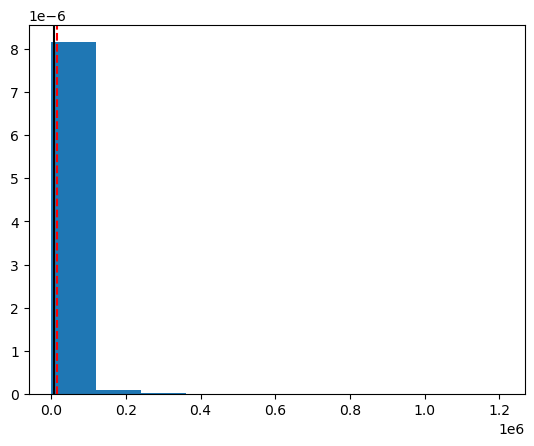

In [22]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['revol.bal'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['revol.bal'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['revol.bal'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are close
- Many outliers and a positively skewed distribution
- Some outliers might be creating noise, and may need to be treated

### revol.util

<AxesSubplot:xlabel='revol.util'>

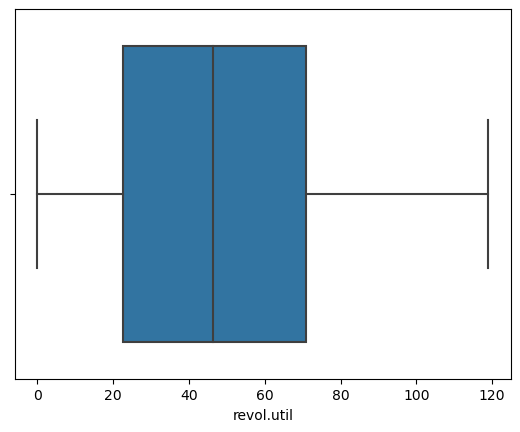

In [23]:
sns.boxplot(x=loan_data['revol.util'])

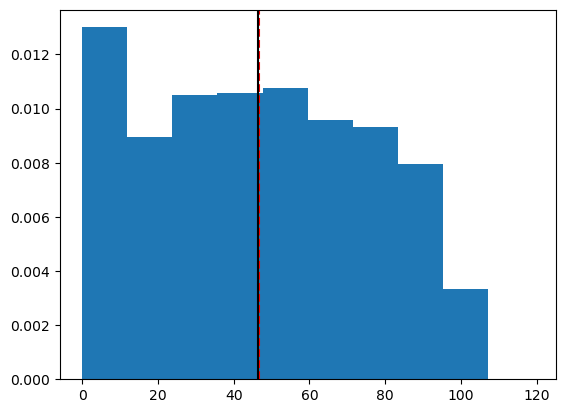

In [24]:

import matplotlib.pyplot as plt
hist = plt.hist(x=loan_data['revol.util'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(loan_data['revol.util'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(loan_data['revol.util'].median(), color = 'black', linestyle='-')

Observations:
- Mean and Median are close
- Symmetrically distributed

# Categorical Features - Univariate Analysis

### purpose

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'all_other'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

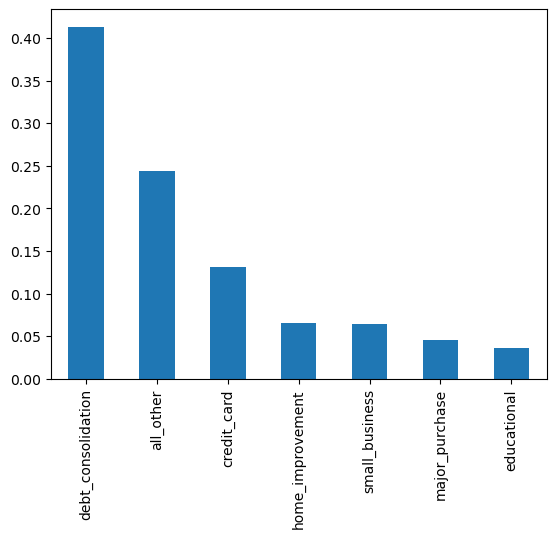

In [25]:
loan_data['purpose'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 90)

Observation:
- About 40% loans were taken for debt consolidation, followed by 15% credit cards, and smaller %s for small business, major purchase and education. All Others comprised of about 25%

### credit.policy

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

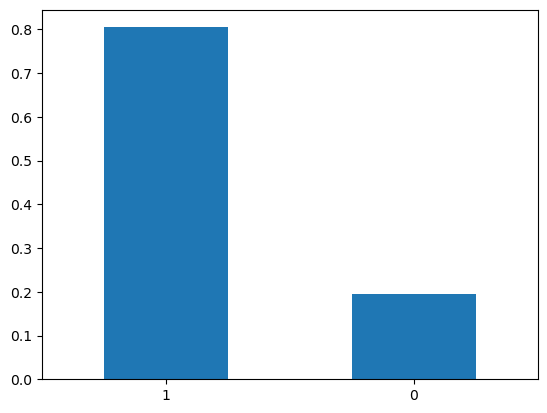

In [26]:
loan_data['credit.policy'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% customers meet the lending criteria of LendingClub, while 20% do not meet this criteria

### inq.last.6.mths

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '15'),
  Text(14, 0, '13'),
  Text(15, 0, '14'),
  Text(16, 0, '18'),
  Text(17, 0, '16'),
  Text(18, 0, '19'),
  Text(19, 0, '24'),
  Text(20, 0, '17'),
  Text(21, 0, '33'),
  Text(22, 0, '20'),
  Text(23, 0, '27'),
  Text(24, 0, '25'),
  Text(25, 0, '28'),
  Text(26, 0, '31'),
  Text(27, 0, '32')])

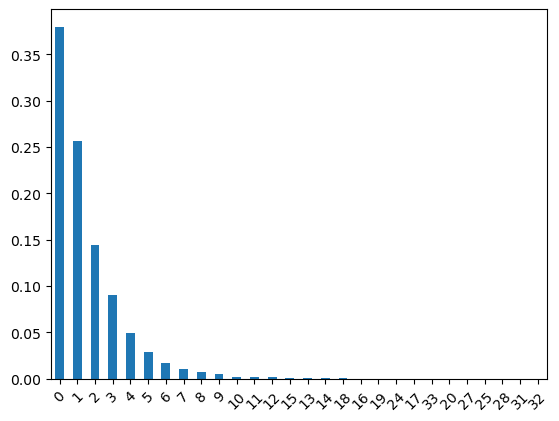

In [27]:
loan_data['inq.last.6mths'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 45)

Observation:
- More than 35% customers do not have any inquiries in their last 6 months, which means that they are not actively looking for new credit products; however, there are a few who have more than 2 inquiries in the last 6 months, which reflecting an active search for new credit

### delinq.2yrs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '13'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '11')])

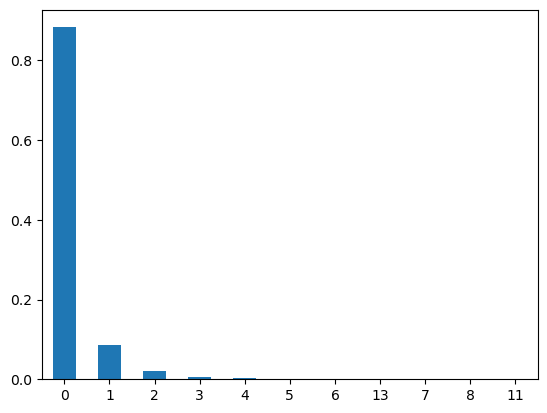

In [28]:
loan_data['delinq.2yrs'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Delinquency is defined by the data provider as being 30+ days past due. More than 80% customers have not had any delinquency in the past 2 years, while less than 2% have had 1. Obviously, as number of delinquencies increase, the customer moves from a good customer to a bad customer

# Bivariate Analysis

Text(0, 0.5, 'installment')

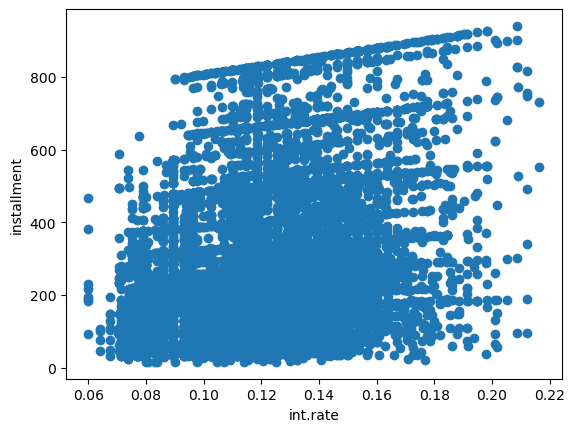

In [29]:
plt.scatter(loan_data['int.rate'], loan_data['installment'])
plt.xlabel("int.rate")
plt.ylabel("installment")

Reflects no correlation between int.rate and installment

In [30]:
#sns.kdeplot(data = loan_data, x = 'int.rate', hue = 'not.fully.paid')

In [31]:
#sns.pairplot(data = loan_data[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
#'revol.util']], diag_kind= 'kde', hue = loan_data['not.fully.paid'])

Text(0, 0.5, 'log.annual.inc')

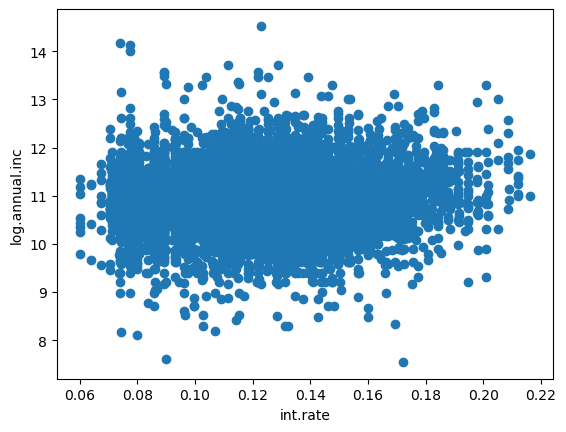

In [32]:
plt.scatter(loan_data['int.rate'], loan_data['log.annual.inc'])
plt.xlabel("int.rate")
plt.ylabel("log.annual.inc")

Text(0, 0.5, 'dti')

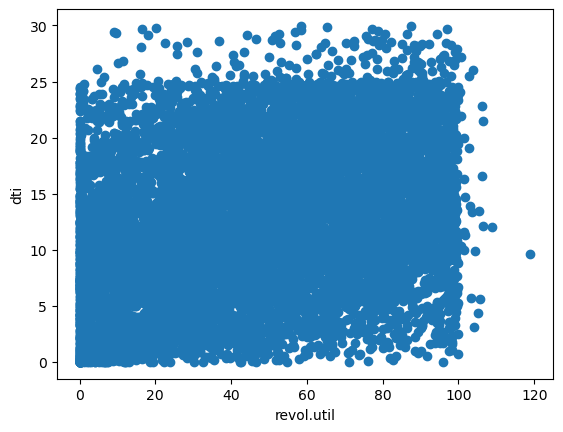

In [33]:
plt.scatter(loan_data['revol.util'], loan_data['dti'])
plt.xlabel("revol.util")
plt.ylabel("dti")

### Identifying Correlation

For numeric variables, Pearson Correlation is used while for categorical variables, Spearman Correlation is used

In [34]:
loan_data[['int.rate', 'installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']].corr()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
int.rate,1.00,0.28,0.06,0.22,-0.71,-0.12,0.09,0.46
installment,0.28,1.00,0.45,0.05,0.09,0.18,0.23,0.08
log.annual.inc,0.06,0.45,1.00,-0.05,0.11,0.34,0.37,0.05
dti,0.22,0.05,-0.05,1.00,-0.24,0.06,0.19,0.34
fico,-0.71,0.09,0.11,-0.24,1.00,0.26,-0.02,-0.54
days.with.cr.line,-0.12,0.18,0.34,0.06,0.26,1.00,0.23,-0.02
revol.bal,0.09,0.23,0.37,0.19,-0.02,0.23,1.00,0.20
revol.util,0.46,0.08,0.05,0.34,-0.54,-0.02,0.20,1.00


In [35]:
loan_data[['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].corr(method = 'spearman')

,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec
credit.policy,1.00,-0.43,-5.78e-02,-4.87e-02
inq.last.6mths,-0.43,1.00,2.11e-02,5.59e-02
delinq.2yrs,-0.06,0.02,1.00e+00,1.36e-03
pub.rec,-0.05,0.06,1.36e-03,1.00e+00


<AxesSubplot:>

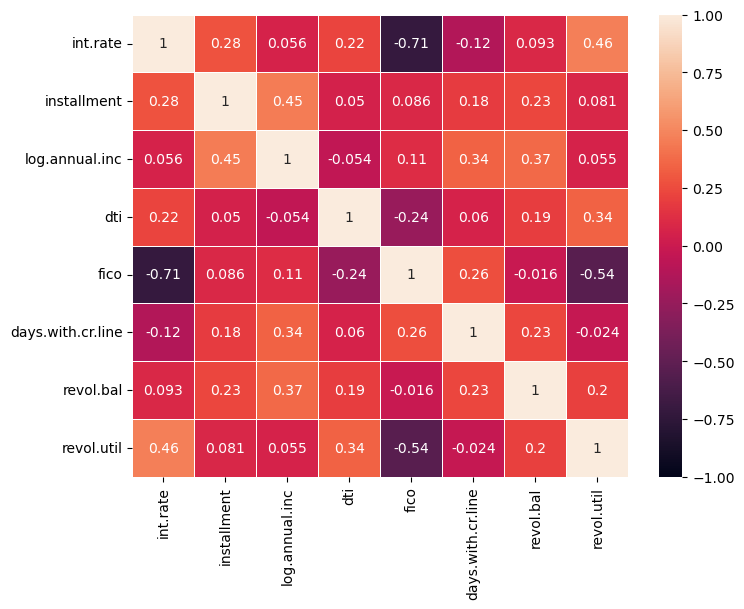

In [36]:
# Plot the Correlation matrix - numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(loan_data[['int.rate', 'installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']].corr(),
            annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

A cutoff of 0.75 is set for this research, i.e., variables with correlation > 0.7 will be classified as highly correlated.

The following variables are correlated - however, not as high as the set cut-off:
- int.rate and fico
- fico and revol.util
- int.rate and revol.util

These correlations are intuitively correct. Since the correlation is negative, it suggests that borrowers with a better FICO score get a lower rate of interest, and their revolving utilization is also lower

<AxesSubplot:>

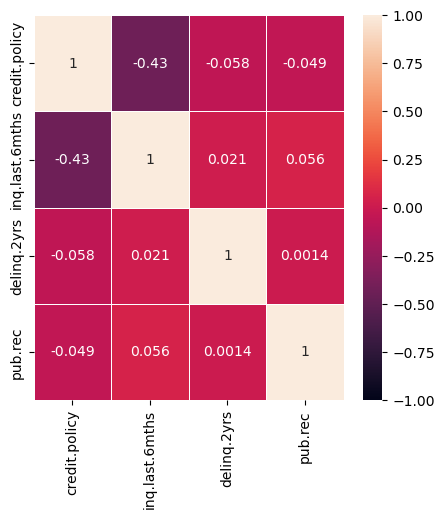

In [37]:
# Plot the Correlation matrix - categorical variables
plt.figure(figsize=(5,5))
sns.heatmap(loan_data[['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].corr(method = 'spearman'),
            annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

Based on the cut-off of 0.75, none of the categorical variables appears to be highly correlated

## Detecting multicollinearity using VIF

In [38]:
# Calculating VIF for all numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = loan_data[['int.rate', 'installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,int.rate,32.19
1,installment,4.10
2,log.annual.inc,364.30
3,dti,5.08
4,fico,263.94
5,days.with.cr.line,5.09
6,revol.bal,1.54
7,revol.util,5.39


In [39]:
# Calculating VIF for all numerical variables except fico
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = loan_data[['int.rate', 'installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,int.rate,29.87
1,installment,4.03
2,log.annual.inc,29.93
3,dti,4.98
4,days.with.cr.line,5.09
5,revol.bal,1.45
6,revol.util,5.08


In [40]:
# Calculating VIF for all numerical variables except int.rate
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = loan_data[['installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,installment,3.82
1,log.annual.inc,11.00
2,dti,4.89
3,days.with.cr.line,4.87
4,revol.bal,1.43
5,revol.util,4.20


Although VIF factors are high for features in the original dataset, since the number of variables is already only a few, we will continue with all the variables and not remove any of them

## Data Prep for Moedling

In [43]:
# OneHotEncoding of object dtype columns
data_col = ['purpose']
dummies = pd.get_dummies(loan_data[data_col])
dummies

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


In [44]:
#Concat dummmies into data frame
loan_data = pd.concat([loan_data, dummies], axis = 1)

In [45]:
loan_data.shape

(9578, 21)

In [46]:
# Drop original categorical columns from data frame
loan_data = loan_data.drop(data_col, axis = 1)

In [47]:
loan_data.shape

(9578, 20)

### Balancing Dataset

In [48]:
# determine whether tha target column is balanced or not
loan_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Since the original dataset is imbalanced, we will be modelling both using default weights parameter as well as using the inbuilt class-weighting to assign higher weight to the positive class

### Train-Test Split original dataset

In [61]:
x = loan_data.drop(columns = ['not.fully.paid'])
y = loan_data['not.fully.paid']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [63]:
x_train.shape

(7183, 19)

In [64]:
x_test.shape

(2395, 19)

In [65]:
y_train.shape

(7183,)

In [66]:
y_test.shape

(2395,)

# Developing Classification Models on Original Dataset

In [74]:
def get_metrics_score(clf, flag = True):
    '''
    Function to calculate the following metrics of a fitted classifier - Accuracy, Recall and Precision
    Params:
    -------
    clf: a fitted classifier to predict values
    '''

    # defining an empty list to store train and test results
    score_list=[] 
    # predict on both the training and test sets
    pred_train = clf.predict(x_train)
    pred_test = clf.predict(x_test)
    pred_test_proba = clf.predict_proba(x_test)[:,1]
    # calculate Accuracy
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)
    # calculate Recall
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)
    # calculate Precision
    train_precision = precision_score(y_train, pred_train)
    test_precision = precision_score(y_test, pred_test)
    # calculate F1 score
    F1_Score = f1_score(y_test, pred_test)
    # calculate ROC_AUC_score
    Roc_Auc_score = roc_auc_score(y_test, pred_test_proba)    
    # add these scores to score_list
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, f1_score, roc_auc_score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
        print("F1_Score : ", F1_Score)
        print("Roc_Auc_score : ", Roc_Auc_score)
    
    return score_list # returning the list with train and test scores

# RandomForest Classifier

In [166]:
rf = RandomForestClassifier(random_state = 42)
t0 = time.time()
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)
print("Training time of Random Forest:", time.time()-t0)

Training time of Random Forest: 0.9282641410827637


In [142]:
predictions_rf.shape

(2395,)

In [143]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

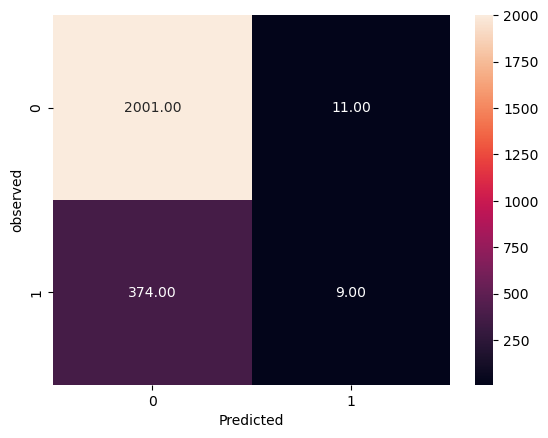

In [144]:
draw_cm(y_test, predictions_rf)

In [145]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2012
           1       0.45      0.02      0.04       383

    accuracy                           0.84      2395
   macro avg       0.65      0.51      0.48      2395
weighted avg       0.78      0.84      0.77      2395



In [146]:
rf_scores = get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8392484342379958
Recall on training set :  1.0
Recall on test set :  0.02349869451697128
Precision on training set :  1.0
Precision on test set :  0.45
F1_Score :  0.04466501240694789
Roc_Auc_score :  0.6526701410336934


# DecisionTree Classifier

In [167]:
dt = DecisionTreeClassifier(random_state = 42)
t0 = time.time()
dt.fit(x_train, y_train)
predictions_dt = dt.predict(x_test)
print("Training time of Decision Tree:", time.time()-t0)

Training time of Decision Tree: 0.06183648109436035


In [149]:
predictions_dt.shape

(2395,)

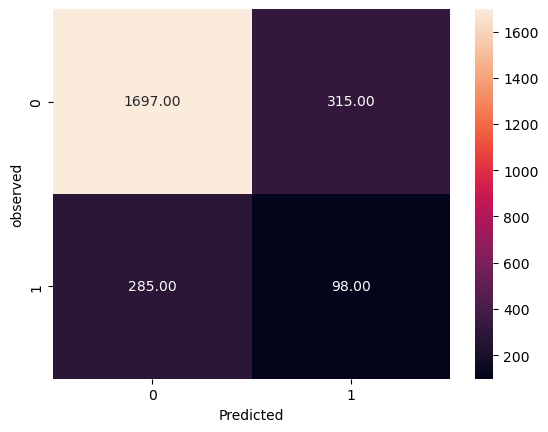

In [150]:
draw_cm(y_test, predictions_dt)

In [151]:
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2012
           1       0.24      0.26      0.25       383

    accuracy                           0.75      2395
   macro avg       0.55      0.55      0.55      2395
weighted avg       0.76      0.75      0.75      2395



In [152]:
dt_scores = get_metrics_score(dt)

Accuracy on training set :  1.0
Accuracy on test set :  0.7494780793319415
Recall on training set :  1.0
Recall on test set :  0.2558746736292428
Precision on training set :  1.0
Precision on test set :  0.23728813559322035
F1_Score :  0.24623115577889448
Roc_Auc_score :  0.5496570187231701


# KNeighbours Classifier

In [168]:
kn = KNeighborsClassifier(n_neighbors=5)
t0 = time.time()
kn.fit(x_train, y_train)
predictions_kn = kn.predict(x_test)
print("Training time of KNeighbors:", time.time()-t0)

Training time of KNeighbors: 0.32177114486694336


C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [155]:
predictions_kn.shape

(2395,)

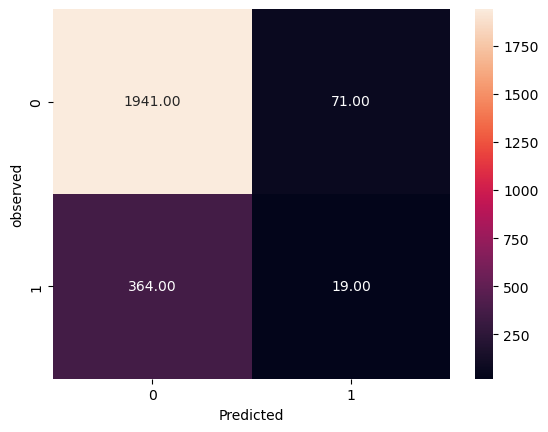

In [156]:
draw_cm(y_test, predictions_kn)

In [157]:
print(classification_report(y_test, predictions_kn))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2012
           1       0.21      0.05      0.08       383

    accuracy                           0.82      2395
   macro avg       0.53      0.51      0.49      2395
weighted avg       0.74      0.82      0.77      2395



In [158]:
kn_scores = get_metrics_score(kn)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\muham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy on training set :  0.8511763886955311
Accuracy on test set :  0.8183716075156576
Recall on training set :  0.16260869565217392
Recall on test set :  0.04960835509138381
Precision on training set :  0.6382252559726962
Precision on test set :  0.2111111111111111
F1_Score :  0.080338266384778
Roc_Auc_score :  0.5110557282934248


# Logistic Regression Classifier

In [169]:
lr = LogisticRegression(random_state = 42, class_weight = None, max_iter=1000)
t0 = time.time()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
print("Training time Logistic Regression:", time.time()-t0)

Training time Logistic Regression: 0.08661532402038574


In [92]:
predictions_lr.shape

(2395,)

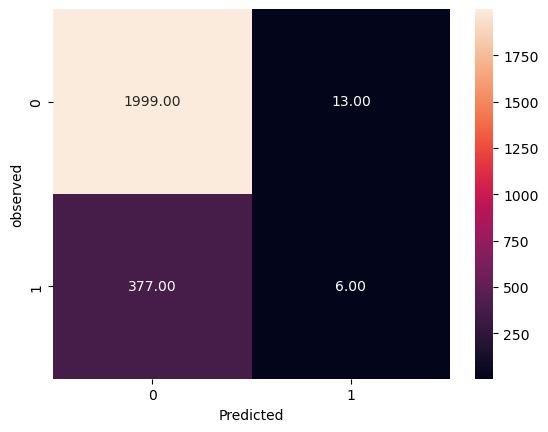

In [93]:
draw_cm(y_test, predictions_lr)

In [94]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2012
           1       0.32      0.02      0.03       383

    accuracy                           0.84      2395
   macro avg       0.58      0.50      0.47      2395
weighted avg       0.76      0.84      0.77      2395



In [95]:
lr_scores = get_metrics_score(lr)

Accuracy on training set :  0.8393428929416679
Accuracy on test set :  0.837160751565762
Recall on training set :  0.01565217391304348
Recall on test set :  0.015665796344647518
Precision on training set :  0.45
Precision on test set :  0.3157894736842105
F1_Score :  0.029850746268656712
Roc_Auc_score :  0.6427557371177635


## AdaBoost

In [170]:
abc = AdaBoostClassifier(random_state = 42)
t0 = time.time()
abc.fit(x_train, y_train)
predictions_abc = abc.predict(x_test)
print("Training time of ADABoost:", time.time()-t0)

Training time of ADABoost: 0.30173540115356445


In [97]:
predictions_abc.shape

(2395,)

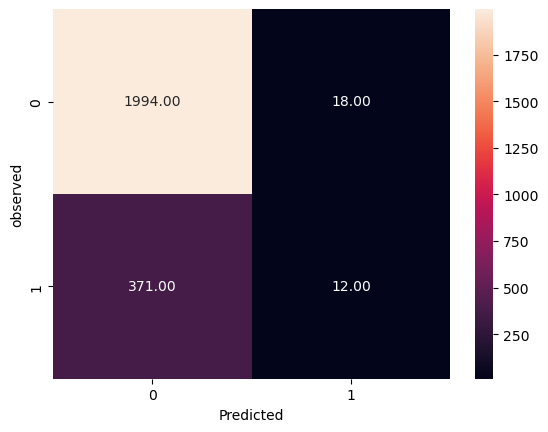

In [98]:
draw_cm(y_test, predictions_abc)

In [99]:
print(classification_report(y_test, predictions_abc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2012
           1       0.40      0.03      0.06       383

    accuracy                           0.84      2395
   macro avg       0.62      0.51      0.48      2395
weighted avg       0.77      0.84      0.77      2395



In [100]:
abc_scores = get_metrics_score(abc)

Accuracy on training set :  0.8421272448837533
Accuracy on test set :  0.8375782881002087
Recall on training set :  0.049565217391304345
Recall on test set :  0.031331592689295036
Precision on training set :  0.5816326530612245
Precision on test set :  0.4
F1_Score :  0.058111380145278446
Roc_Auc_score :  0.6587628277333388


## XGBoost Classifier

In [171]:
xgb = XGBClassifier(random_state = 42)
t0 = time.time()
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)
print("Training time of XGBoost:", time.time()-t0)

Training time of XGBoost: 0.33776354789733887


In [102]:
predictions_xgb.shape

(2395,)

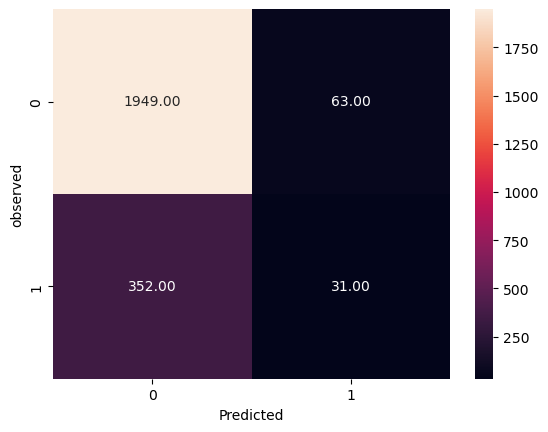

In [103]:
draw_cm(y_test, predictions_xgb)

In [104]:
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2012
           1       0.33      0.08      0.13       383

    accuracy                           0.83      2395
   macro avg       0.59      0.52      0.52      2395
weighted avg       0.76      0.83      0.78      2395



In [105]:
xgb_scores = get_metrics_score(xgb)

Accuracy on training set :  0.9582347208687179
Accuracy on test set :  0.826722338204593
Recall on training set :  0.7391304347826086
Recall on test set :  0.08093994778067885
Precision on training set :  1.0
Precision on test set :  0.32978723404255317
F1_Score :  0.129979035639413
Roc_Auc_score :  0.6181578933708454


# Developing Classification Models on Balanced Dataset

# RandomForest Classifier

In [165]:
rf_balanced =RandomForestClassifier(random_state=42, class_weight='balanced')
t0 = time.time()
rf_balanced.fit(x_train, y_train)
predictions_rf_balanced = rf_balanced.predict(x_test)
print("Training time of Random Forest Balanced:", time.time()-t0)

Training time of Random Forest Balanced: 0.8699312210083008


In [107]:
predictions_rf_balanced.shape

(2395,)

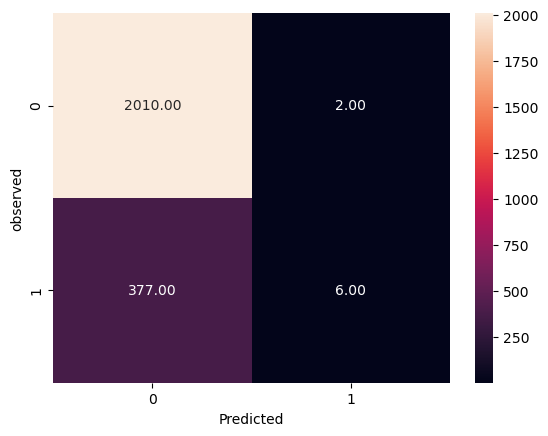

In [108]:
draw_cm(y_test, predictions_rf_balanced)

In [109]:
print(classification_report(y_test, predictions_rf_balanced))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.75      0.02      0.03       383

    accuracy                           0.84      2395
   macro avg       0.80      0.51      0.47      2395
weighted avg       0.83      0.84      0.77      2395



In [110]:
rf_balanced_scores = get_metrics_score(rf_balanced)

Accuracy on training set :  0.9998607824028958
Accuracy on test set :  0.8417536534446765
Recall on training set :  0.9991304347826087
Recall on test set :  0.015665796344647518
Precision on training set :  1.0
Precision on test set :  0.75
F1_Score :  0.030690537084398978
Roc_Auc_score :  0.6544233294748479


# DecisionTree Classifier

In [172]:
dt_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced')
t0 = time.time()
dt_balanced.fit(x_train, y_train)
predictions_dt_balanced = dt_balanced.predict(x_test)
print("Training time of Decision Tree Balanced:", time.time()-t0)

Training time of Decision Tree Balanced: 0.05858445167541504


In [112]:
predictions_dt_balanced.shape

(2395,)

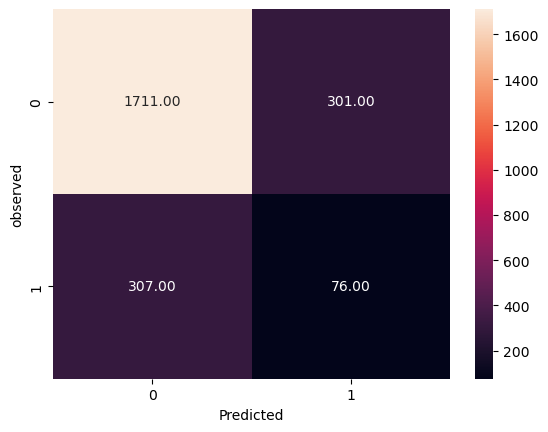

In [113]:
draw_cm(y_test, predictions_dt_balanced)

In [114]:
print(classification_report(y_test, predictions_dt_balanced))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2012
           1       0.20      0.20      0.20       383

    accuracy                           0.75      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.74      0.75      0.75      2395



In [115]:
dt_balanced_scores = get_metrics_score(dt_balanced)

Accuracy on training set :  1.0
Accuracy on test set :  0.7461377870563675
Recall on training set :  1.0
Recall on test set :  0.19843342036553524
Precision on training set :  1.0
Precision on test set :  0.20159151193633953
F1_Score :  0.20000000000000004
Roc_Auc_score :  0.5244155173398253


# KNeighbours Classifier

In [173]:
kn_balanced = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
t0 = time.time()
kn_balanced.fit(x_train, y_train)
predictions_kn_balanced = kn_balanced.predict(x_test)
print("Training time of KNeighbors Balanced:", time.time()-t0)

Training time of KNeighbors Balanced: 0.257993221282959


In [117]:
predictions_kn_balanced.shape

(2395,)

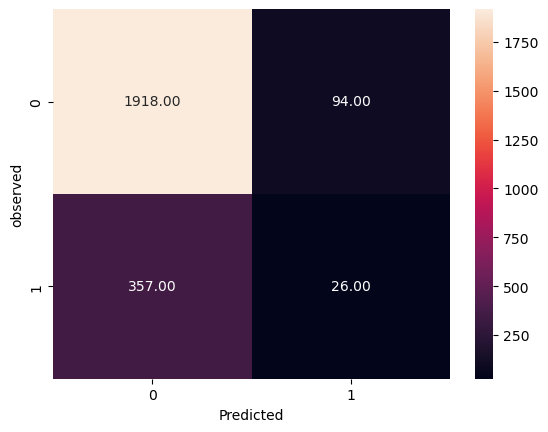

In [118]:
draw_cm(y_test, predictions_kn_balanced)

In [119]:
print(classification_report(y_test, predictions_kn_balanced))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2012
           1       0.22      0.07      0.10       383

    accuracy                           0.81      2395
   macro avg       0.53      0.51      0.50      2395
weighted avg       0.74      0.81      0.77      2395



In [120]:
kn_balanced_scores = get_metrics_score(kn_balanced)

Accuracy on training set :  1.0
Accuracy on test set :  0.8116910229645093
Recall on training set :  1.0
Recall on test set :  0.06788511749347259
Precision on training set :  1.0
Precision on test set :  0.21666666666666667
F1_Score :  0.10337972166998013
Roc_Auc_score :  0.5135615809062076


# Logistic Regression Classifier

In [174]:
lr_balanced = LogisticRegression(random_state = 42, class_weight='balanced', max_iter=1000)
t0 = time.time()
lr_balanced.fit(x_train, y_train)
predictions_lr_balanced = lr_balanced.predict(x_test)
print("Training time of Logistic Regression Balanced:", time.time()-t0)

Training time of Logistic Regression Balanced: 0.1299433708190918


In [122]:
predictions_lr_balanced.shape

(2395,)

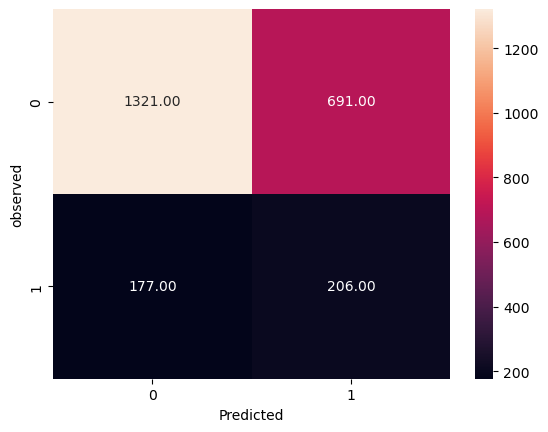

In [123]:
draw_cm(y_test, predictions_lr_balanced)

In [124]:
print(classification_report(y_test, predictions_lr_balanced))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75      2012
           1       0.23      0.54      0.32       383

    accuracy                           0.64      2395
   macro avg       0.56      0.60      0.54      2395
weighted avg       0.78      0.64      0.68      2395



In [125]:
lr_balanced_scores = get_metrics_score(lr_balanced)

Accuracy on training set :  0.6334400668244466
Accuracy on test set :  0.6375782881002088
Recall on training set :  0.5417391304347826
Recall on test set :  0.5378590078328982
Precision on training set :  0.22828875045804323
Precision on test set :  0.22965440356744704
F1_Score :  0.32187499999999997
Roc_Auc_score :  0.6336186536135666


# Choosing the best models

In [126]:
pd.DataFrame(data = {'Random Forest': rf_scores, 'Random Forest Balanced': rf_balanced_scores, 'Decision Tree': dt_scores, 'Decision Tree Balanced': dt_balanced_scores, 'Logistic Regression': lr_scores, 'Logistic Regression Balanced': lr_balanced_scores, 'KNeighbours': kn_scores,'KNeighbours Balanced': kn_balanced_scores,'AdaBoost': abc_scores, 'XGBoost': xgb_scores}, index = ['Accuracy - Train', 'Accuracy - Test', 'Recall - Train', 'Recall - Test', 'Precision - Train', 'Precision - Test', 'F1', 'ROC'])

,Random Forest,Random Forest Balanced,Decision Tree,Decision Tree Balanced,Logistic Regression,Logistic Regression Balanced,KNeighbours,KNeighbours Balanced,AdaBoost,XGBoost
Accuracy - Train,1.0,1.0,1.0,1.0,0.84,0.63,0.85,1.0,0.84,0.96
Accuracy - Test,0.84,0.84,0.75,0.75,0.84,0.64,0.82,0.81,0.84,0.83
Recall - Train,1.0,1.0,1.0,1.0,0.02,0.54,0.16,1.0,0.05,0.74
Recall - Test,0.02,0.02,0.26,0.2,0.02,0.54,0.05,0.07,0.03,0.08
Precision - Train,1.0,1.0,1.0,1.0,0.45,0.23,0.64,1.0,0.58,1.0
Precision - Test,0.45,0.75,0.24,0.2,0.32,0.23,0.21,0.22,0.4,0.33
F1,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>,<function f1_score at 0x000001797CB29820>
ROC,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>,<function roc_auc_score at 0x000001797CB24280>


# Cross Validation

In [127]:
# Cross Validation on Decision tree

from sklearn.model_selection import KFold, cross_val_score

clf = dt

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.73208072 0.73695198 0.74599861 0.72284123 0.76114206]
Average CV Score:  0.7398029204296324
Number of CV Scores used in Average:  5


In [128]:
# Cross Validation on Logistic Regression Balanced

clf = lr_balanced

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.64857342 0.62978427 0.57132916 0.63579387 0.63231198]
Average CV Score:  0.6235585394362675
Number of CV Scores used in Average:  5


In [129]:
# Cross Validation on XGBoost

clf = xgb

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81210856 0.83646486 0.8308977  0.81754875 0.8356546 ]
Average CV Score:  0.8265348926016169
Number of CV Scores used in Average:  5


Random Forest takes a very slight edge after Corss Validation of the results.

However, since the difference in CV is not significant, we will rely on our primary criteria, i.e., FI Score - based on which Logistic Regression Balanced is our selected model

# ROC Curve Plot

### DecisionTree

In [130]:
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Decision Tree AUC score: 0.5496570187231701


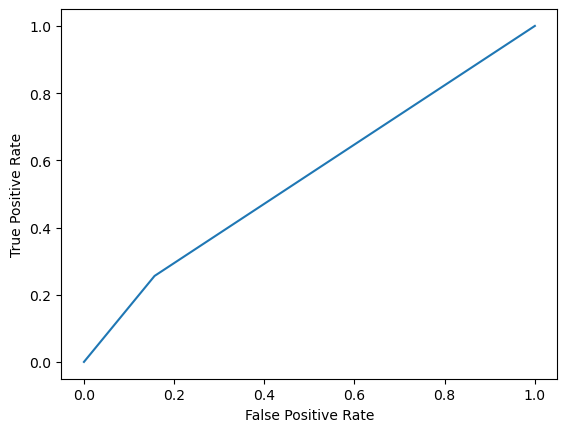

In [135]:
plot_roc_curve(y_test, predictions_dt)
print(f'Decision Tree AUC score: {roc_auc_score(y_test, predictions_dt)}')

### XGBoost

XGBoost AUC score: 0.5248139102720492


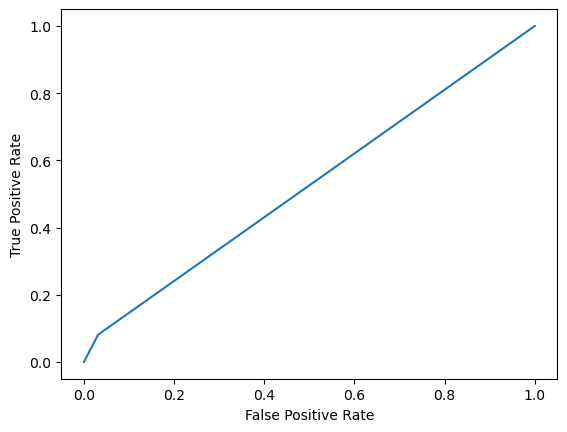

In [136]:
plot_roc_curve(y_test, predictions_xgb)
print(f'XGBoost AUC score: {roc_auc_score(y_test, predictions_xgb)}')

### Logistic Regression Balanced

Logistic Regression AUC score: 0.5972098220079004


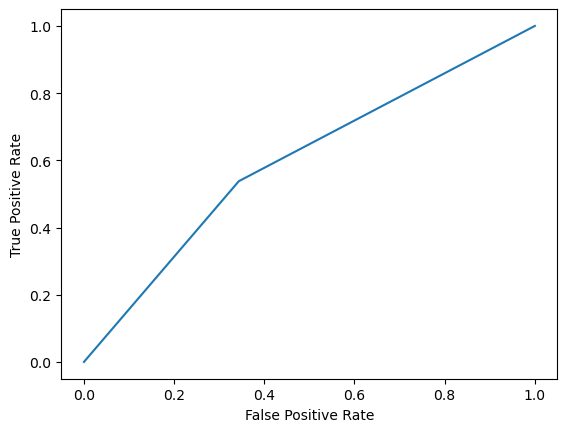

In [175]:
plot_roc_curve(y_test, predictions_lr_balanced)
print(f'Logistic Regression AUC score: {roc_auc_score(y_test, predictions_lr_balanced)}')